# Recognizing networks in image data

[Run notebook in Google Colab](https://colab.research.google.com/github/pathpy/pathpy/blob/master/doc/tutorial/network_recognition.ipynb)  
[Download notebook](https://github.com/pathpy/pathpy/raw/master/doc/tutorial/network_recognition.ipynb)

To facilitate the reconstruction of network data from illustrations in academic publications or hand-drawn toy examples, `pathpy` provides basic support for optical network recognition, i.e. the reconstruction of networks from pixel images.

This tutorial gives a basic introduction into this new feature.

In [ ]:
pip install git+git://github.com/pathpy/pathpy.git

In [1]:
import pathpy as pp

# to read and plot image from web url
from matplotlib import pyplot as plt
from skimage import io

# for demo of user-drawn input
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

Assume we have access to an image of a network, e.g. via a web url. We can load and depict such an online image using `skimage`.

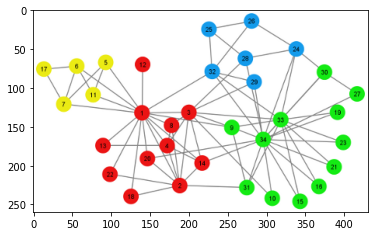

In [2]:
img = io.imread('http://www.ludowaltman.nl/slm/network.png')
plt.imshow(img)

To turn this image into a `pathpy` network object, we can call the function `from_image` in the module `io.network_recognition`. This allows us to pass a url to the image or a file path to a locally stored image. 

In the current version, we still have to assist the recognition process by setting some basic parameters. For instance, it is useful to set the (approximate) number of nodes in the network, as well as the range of radii that the circular node shapes have.

In [8]:
n = pp.io.network_recognition.from_image('http://www.ludowaltman.nl/slm/network.png', 
                                         num_nodes=34, 
                                         node_radius=(8,15),
                                         threshold=10, 
                                         max_edge_gap=20, 
                                         min_edge_length=5, 
                                         intersect_tolerance_factor=1.3)
print(n)
n.plot()

Uid:			0x1694e9eb470
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	34
Number of edges:	94


Ad you can see above, the positions of nodes are automatically translated to pathpy node positions, such that we can plot the network in the originally depicted layout. The recognition of (circular) nodes works quite reliably. Depending on the image resolution and quality, the detection of edges is less reliable and requires some parameter tuning (and potentially manual corrections).

For small toy examples, the method works quite reliably. However, we currently do not recognize edge directions (i.e. the recognized network will be undirected) and self-loops are ignored.

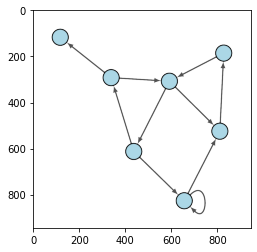

In [9]:
img = io.imread('https://warehouse-camo.ingress.cmh1.psfhosted.org/f84df05d3a3e854421ec0b7a637df194070450dd/68747470733a2f2f6861636b6c2e6769746875622e696f2f6e6574776f726b3274696b7a2f706c6f745f30332e706e67')
plt.imshow(img)

In [12]:
n = pp.io.network_recognition.from_image(
    'https://warehouse-camo.ingress.cmh1.psfhosted.org/f84df05d3a3e854421ec0b7a637df194070450dd/68747470733a2f2f6861636b6c2e6769746875622e696f2f6e6574776f726b3274696b7a2f706c6f745f30332e706e67', 
    sigma=0.1, 
    num_nodes=7, 
    node_radius=(35,45), 
    threshold=2, 
    max_edge_gap=55, 
    min_edge_length=90, 
    intersect_tolerance_factor=1.1)
print(n)
n.plot()

Uid:			0x1695031c2e8
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	7
Number of edges:	9


We can even recognize hand-drawn networks as shown in the following example. If you change the next cell into a code cell and execute it, a Tk input canvas will appear that allows you to draw a network by hand (or mouse). Press the save button to save the network to a local `jpg` file.

```
width = 200
height = 200
center = height//2

def save_img():
    filename = "user_input.jpg"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="red",width=5)

master = Tk()
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

output_image = PIL.Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)
button=Button(text="save image",command=save_img)
button.pack()

master.mainloop()
```

Let's show the hand-drawn image using `skimage`:

In [ ]:
img = io.imread('user_input.jpg')
plt.imshow(img)

We can now turn this example into a `pathpy` object:

In [ ]:
n = pp.io.network_recognition.from_image('user_input.jpg', num_nodes=3, node_radius=(20,40), threshold=20, max_edge_gap=5, min_edge_length=20, intersect_tolerance_factor=1.5)
n.plot()